Best individual after evolution: [1, 0, 0, 2, 0]


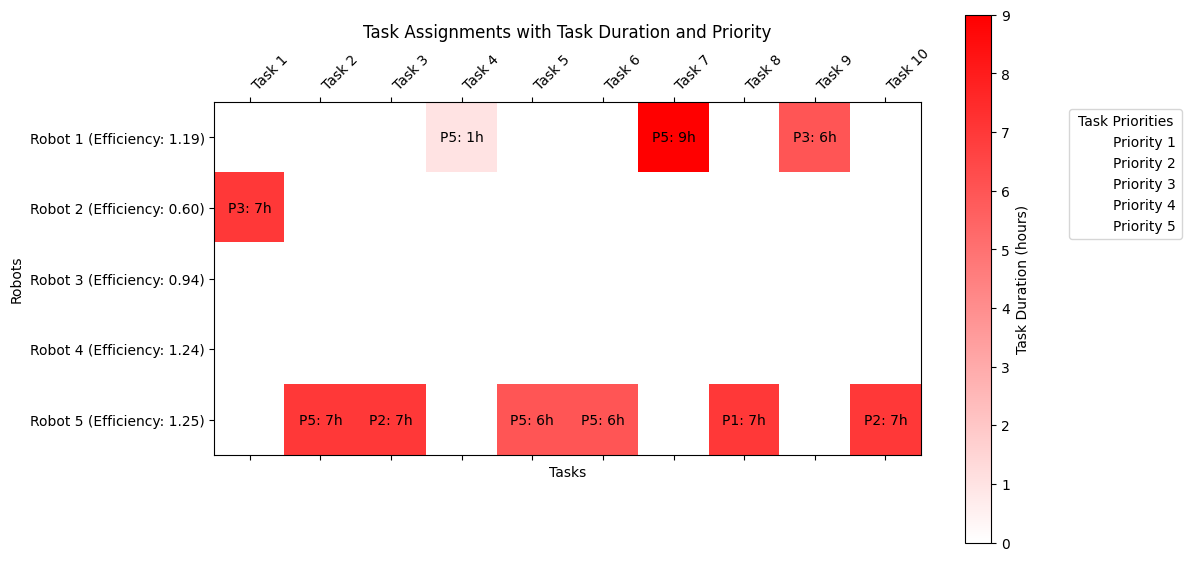

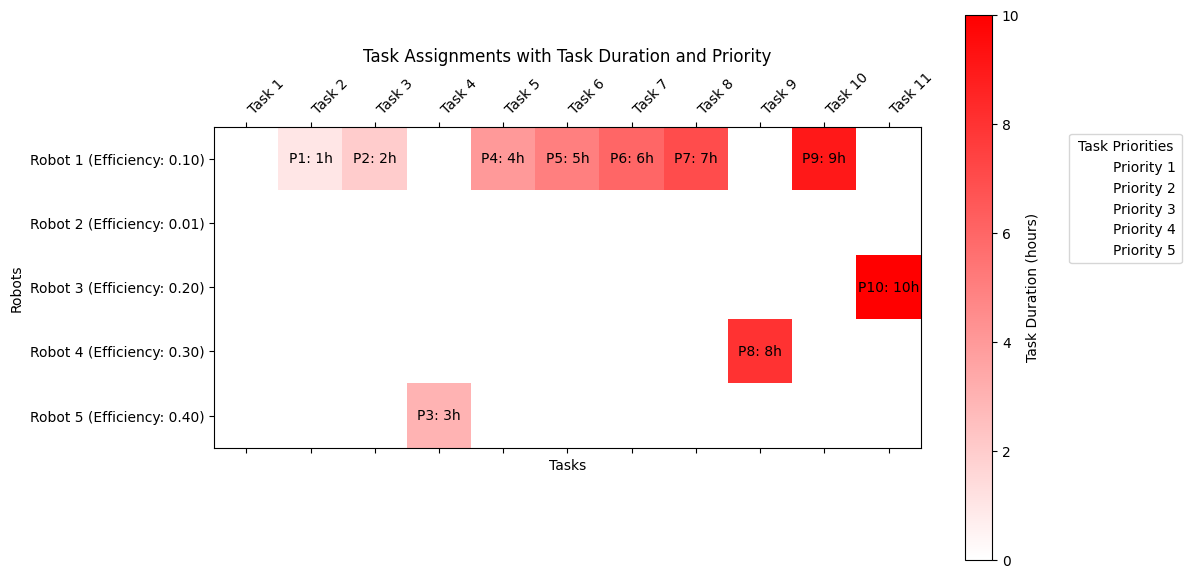

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from matplotlib.colors import LinearSegmentedColormap

class GeneticAlgorithm:
    def __init__(self, num_tasks, num_robots, tasks, robots, population_size=50, crossover_rate=0.3, mutation_rate=0.1, generations=100):
        self.num_tasks = num_tasks
        self.num_robots = num_robots
        self.tasks = tasks
        self.robots = robots
        self.population_size = population_size
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.generations = generations
        self.population = self.initialize_population()

    def initialize_population(self):
        population = []
        for _ in range(self.population_size):
            chromosome = self.generate_chromosome()
            population.append(chromosome)
        return population
        #Ei function ta ekta loop chalay, population_size bar.
        #Loop each bar e, ekta chromosome generate kore, and then oi chromosome ke population list er moddhe append kore.
        #Finally, oi population list ta ke return kore.
        #So, function ta basically population er jonno random initial solutions generate kore.

    def generate_chromosome(self):
        chromosome = []
        for _ in range(self.num_tasks):
            # Assign a random robot to each task
            chromosome.append(random.randint(0, self.num_robots - 1))
        return chromosome
#Ei generate_chromosome function ta ekta loop chalay, num_tasks bar.
#Loop each bar e, ekta random robot ke ekta task er jonno assign kore,
#ar oi robot er index ta chromosome list er moddhe append kore.
#erpr chromosome list ta ke return kore.
#So, function ta basically ekta random chromosome generate kore,
#jekhane proti task er jonno ekta random robot assign kora hoy.

    def calculate_total_production_time(self, individual):
        robot_times = [0] * self.num_robots
        for i in range(self.num_tasks):
            robot_times[individual[i]] += self.tasks[i] / self.robots[individual[i]]
        return max(robot_times)
#Ei calculate_total_production_time function individual hisebe ekta chromosome nie,
#jekhane prottekta index er value ekta task er assigned robot er index dhore nibe.
#Prottekta robot er jonno, function ti calculation kore oi robot er assigned tasks er total time koto,
#ar tarpor oi total times er moddhe maximum time ta return kore.

    def calculate_workload_balance(self, individual):
        robot_times = [0] * self.num_robots
        for i in range(self.num_tasks):
            robot_times[individual[i]] += self.tasks[i] / self.robots[individual[i]]
        mean_time = np.mean(robot_times)
        deviation = np.std(robot_times)
        return deviation
#Prottekta robot er jonno, function ti calculation kore oi robot er assigned tasks er total time koto,
#ar oi total times er moddhe mean time ta calculate kore.
#Tarpor, sei mean time er jonno standard deviation calculate kore, ar ta return kore.

    def fitness_function(self, individual):
        T_total = self.calculate_total_production_time(individual)
        B = self.calculate_workload_balance(individual)
        return T_total + B  # Minimize both T_total and B
#2 ta function cll kore , tader jogfol ekti fitness score hisebe return kore.
#fitness score kom hote hobe karon amader main objective hocche production time (T_total) o workload balance (B) er kom kora.

    def selection(self, population):
        fitness_values = [self.fitness_function(individual) for individual in population]
        total_fitness = sum(fitness_values)
        probabilities = [fitness / total_fitness for fitness in fitness_values]
        selected_indices = np.random.choice(range(len(population)), size=len(population), replace=True, p=probabilities)
        selected_individuals = [population[i] for i in selected_indices]
        return selected_individuals
#np.random.choice function use kore indicidual nirbachon kori.
#replace=True er karon hoitese shob gula individual ke ekbar ekti bar nirbachon kora

    def crossover(self, parent1, parent2):
        if random.random() < self.crossover_rate: #crossover hoy kina check
            crossover_point = random.randint(1, self.num_tasks - 1)
            child1 = parent1[:crossover_point] + parent2[crossover_point:]
            child2 = parent2[:crossover_point] + parent1[crossover_point:]
            return child1, child2
        else:
            return parent1, parent2 # if no crossover

    def mutation(self, individual):
        if random.random() < self.mutation_rate:
            mutation_point = random.randint(0, self.num_tasks - 1) #je position a mutation hobe, seta holo assigned robot er index.
            individual[mutation_point] = random.randint(0, self.num_robots - 1) #Tarpor ei position e ekta random robot index assign kora hoy.
        return individual

    def evolve(self): #population update
        for generation in range(self.generations):
            selected_individuals = self.selection(self.population) # selected cromosome e crossover kora hoy
            offspring = [] #c1, c2
            for i in range(0, len(selected_individuals), 2):
                parent1 = selected_individuals[i]
                parent2 = selected_individuals[i + 1]
                child1, child2 = self.crossover(parent1, parent2)
                child1 = self.mutation(child1) #offspring chromosomes er random position e mutation apply
                child2 = self.mutation(child2)
                offspring.extend([child1, child2])
            self.population = offspring
#updated hoy ei offspring list er sathe, jaate next generation er jonno updated population thake.
        # Return the best individual found
        best_individual = min(self.population, key=self.fitness_function)
        return best_individual #fitness kom

# Example usage:
# Define your tasks and robots
num_tasks = 5
num_robots = 3
tasks = [10, 15, 20, 25, 30]  # Example task times
robots = [2, 3, 4]  # Example robot speeds

# Create a GeneticAlgorithm instance toiri kore to configure
ga = GeneticAlgorithm(num_tasks, num_robots, tasks, robots)

# Example: Evolve the population and find the best individual
best_individual = ga.evolve()
print("Best individual after evolution:", best_individual)

def visualize_assignments(solution, task_durations, task_priorities, robot_efficiencies):
    # Create a grid for visualization based on the solution provided
    grid = np.zeros((len(robot_efficiencies), len(task_durations)))
    for task_idx, robot_idx in enumerate(solution):#prottekta task er assigned robot er index gula enumerate function use kore ber kora hoy and gride set
        grid[robot_idx, task_idx] = task_durations[task_idx]

    fig, ax = plt.subplots(figsize=(12, 6))
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "red"])  # Custom colormap

    # Display the grid with task durations
    cax = ax.matshow(grid, cmap=cmap)
    fig.colorbar(cax, label='Task Duration (hours)')

    # Annotate each cell with task priority and duration
    for i in range(len(robot_efficiencies)):
        for j in range(len(task_durations)):
            if grid[i, j] != 0:
                ax.text(j, i, f'P{task_priorities[j]}: {task_durations[j]}', ha='center', va='center', color='black')
#function ti visualize kore dikhay ekta solution er task allocation kivabe robot er efficiency, task duration, ar task priority er sathe associated ache.
def generate_mock_data(num_tasks=10, num_robots=5):
    task_durations = np.random.randint(1, 11, size=num_tasks)  # Random task durations between 1 and 10 hours
    task_priorities = np.random.randint(1, 6, size=num_tasks)  # Random task priorities between 1 and 5
    robot_efficiencies = np.random.uniform(0.5, 1.5, size=num_robots)  # Random robot efficiencies between 0.5 and 1.5
    return task_durations, task_priorities, robot_efficiencies

def visualize_assignments_improved(solution, task_durations, task_priorities, robot_efficiencies):
    # Create a grid for visualization based on the solution provided
    grid = np.zeros((len(robot_efficiencies), len(task_durations)))
    for task_idx, robot_idx in enumerate(solution):
        grid[robot_idx - 1, task_idx] = task_durations[task_idx]  # Subtract 1 from robot_idx

    fig, ax = plt.subplots(figsize=(12, 6))
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "red"])  # Custom colormap

    # Display the grid with task durations
    cax = ax.matshow(grid, cmap=cmap)
    fig.colorbar(cax, label='Task Duration (hours)')

    # Annotate each cell with task priority and duration
    for i in range(len(robot_efficiencies)):
        for j in range(len(task_durations)):
            if grid[i, j] != 0:
                ax.text(j, i, f'P{task_priorities[j]}: {task_durations[j]}h', ha='center', va='center', color='black')

    # Set the ticks and labels for tasks and robots
    ax.set_xticks(np.arange(len(task_durations)))
    ax.set_yticks(np.arange(len(robot_efficiencies)))
    ax.set_xticklabels([f'Task {i+1}' for i in range(len(task_durations))], rotation=45, ha="left")
    ax.set_yticklabels([f'Robot {i+1} (Efficiency: {eff:.2f})' for i, eff in enumerate(robot_efficiencies)])

    plt.xlabel('Tasks')
    plt.ylabel('Robots')
    plt.title('Task Assignments with Task Duration and Priority')

    # Create a legend for task priorities
    priority_patches = [mpatches.Patch(color='white', label=f'Priority {i}') for i in range(1, 6)]
    plt.legend(handles=priority_patches, bbox_to_anchor=(1.20, 1), loc='upper left', title="Task Priorities")

    plt.tight_layout()
    plt.show()

# Example usage:
task_durations, task_priorities, robot_efficiencies = generate_mock_data()
solution = np.random.randint(1, 6, size=len(task_durations))  # Random solution for visualization
visualize_assignments_improved(solution, task_durations, task_priorities, robot_efficiencies)

def generate_mock_data(num_tasks=10, num_robots=5):
    task_durations = [x for x in range(11)]  # Random task durations between 1 and 10 hours
    task_priorities = [x for x in range(11)]  # Random task priorities between 1 and 5
    robot_efficiencies = [0.1,0.01,0.2,0.3,0.4]  # Random robot efficiencies between 0.5 and 1.5
    return task_durations, task_priorities, robot_efficiencies


def run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies):
    num_tasks = len(task_durations)
    num_robots = len(robot_efficiencies)
    ga = GeneticAlgorithm(num_tasks, num_robots, task_durations, robot_efficiencies)
    best_solution = ga.evolve()
    return best_solution


# Main execution
if __name__ == "__main__":
    num_tasks = 10
    num_robots = 5
    task_durations, task_priorities, robot_efficiencies = generate_mock_data(num_tasks, num_robots)

    # Run GA to find the best solution
    best_solution = run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies)

    # Visualize the initial random assignment
    visualize_assignments_improved(best_solution, task_durations, task_priorities, robot_efficiencies)